In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
train = pd.read_csv('/Users/jenniferwu/Downloads/predict-west-nile-virus/train.csv')
test = pd.read_csv('/Users/jenniferwu/Downloads/predict-west-nile-virus/test.csv')

In [3]:
train.Date = pd.to_datetime(train.Date, format="%Y-%m-%d")
test.Date = pd.to_datetime(train.Date, format="%Y-%m-%d")
train.Species = train.Species.astype('category')
test.Species = train.Species.astype('category')
train.WnvPresent = train.WnvPresent.astype('category')

train.info()
test.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
Date                      10506 non-null datetime64[ns]
Address                   10506 non-null object
Species                   10506 non-null category
Block                     10506 non-null int64
Street                    10506 non-null object
Trap                      10506 non-null object
AddressNumberAndStreet    10506 non-null object
Latitude                  10506 non-null float64
Longitude                 10506 non-null float64
AddressAccuracy           10506 non-null int64
NumMosquitos              10506 non-null int64
WnvPresent                10506 non-null category
dtypes: category(2), datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 841.8+ KB


Index(['Id', 'Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy'],
      dtype='object')

In [4]:
train[['year','month','day']] = train.Date.apply(lambda x: pd.Series(x.strftime("%Y,%m,%d").split(",")))
test[['year','month','day']] = train.Date.apply(lambda x: pd.Series(x.strftime("%Y,%m,%d").split(",")))

#or

In [5]:
train.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,year,month,day
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,2007,05,29
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,2007,05,29
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,2007,05,29
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,2007,05,29
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,2007,05,29


In [6]:
test.head()

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,year,month,day
0,1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,2007,05,29
1,2,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,2007,05,29
2,3,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,2007,05,29
3,4,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,2007,05,29
4,5,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,2007,05,29


In [7]:
test.columns

Index(['Id', 'Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'year', 'month', 'day'],
      dtype='object')

In [8]:
train.Species.value_counts(dropna = False)

CULEX PIPIENS/RESTUANS    4752
CULEX RESTUANS            2740
CULEX PIPIENS             2699
CULEX TERRITANS            222
CULEX SALINARIUS            86
CULEX TARSALIS               6
CULEX ERRATICUS              1
Name: Species, dtype: int64

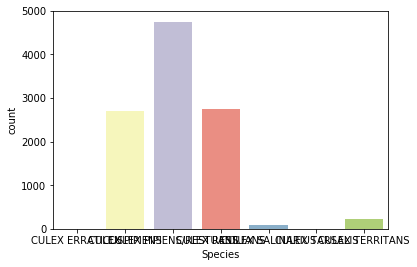

In [9]:
import seaborn as sns
sns.countplot(x="Species", data=train, palette="Set3")

In [10]:
numerical_vars = test.describe()
print(numerical_vars)

                  Id          Block       Latitude      Longitude  \
count  116293.000000  116293.000000  116293.000000  116293.000000   
mean    58147.000000      41.131100      41.849389     -87.693658   
std     33571.041765      24.864726       0.106593       0.080699   
min         1.000000      10.000000      41.644612     -87.930995   
25%     29074.000000      18.000000      41.753411     -87.750938   
50%     58147.000000      39.000000      41.862292     -87.694991   
75%     87220.000000      61.000000      41.951866     -87.648860   
max    116293.000000      98.000000      42.017430     -87.531635   

       AddressAccuracy  
count    116293.000000  
mean          7.954357  
std           1.252733  
min           3.000000  
25%           8.000000  
50%           8.000000  
75%           9.000000  
max           9.000000  


In [11]:
def normalized(x):
    r = (x-np.mean(x))/np.std(x)
    return(r)

In [12]:
train.AddressAccuracy.groupby(train.Species).mean()

Species
CULEX ERRATICUS           9.000000
CULEX PIPIENS             7.424972
CULEX PIPIENS/RESTUANS    7.939604
CULEX RESTUANS            8.019708
CULEX SALINARIUS          7.767442
CULEX TARSALIS            7.500000
CULEX TERRITANS           7.599099
Name: AddressAccuracy, dtype: float64

In [13]:
#datakey - 813 dups
sum(train.duplicated() == True)

813

In [14]:
train['dups'] = train.duplicated()

In [15]:
#looking at the duplicated records, only difference is the number of mosquito, solution is to sum them
#train[train.dups == True].head()

train.columns

Index(['Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'NumMosquitos', 'WnvPresent', 'year', 'month', 'day', 'dups'],
      dtype='object')

In [18]:
#aggregated the numMosquito based on the rest of the variables (no dups record)
train = train.groupby(['Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
        'WnvPresent', 'year', 'month', 'day'], as_index=False).agg({"NumMosquitos": "sum"})

In [22]:
#to check for zero dups 

sum(train.duplicated() == True)

0